# Introduction to Linear Regression

The purpose of machine learning is often to create a model that explains some real-world data, so that we can predict what may happen next, with different inputs.

The simplest model that we can fit to data is a line. When we are trying to find a line that fits a set of data best, we are performing Linear Regression.

We often want to find lines to fit data, so that we can predict unknowns. For example:

- The market price of a house vs. the square footage of a house. Can we predict how much a house will sell for, given its size?
- The tax rate of a country vs. its GDP. Can we predict taxation based on a country’s GDP?
- The amount of chips left in the bag vs. number of chips taken. Can we predict how much longer this bag of chips will last, given how much people at this party have been eating?

Imagine that we had this set of weights plotted against heights of a large set of professional baseball players:

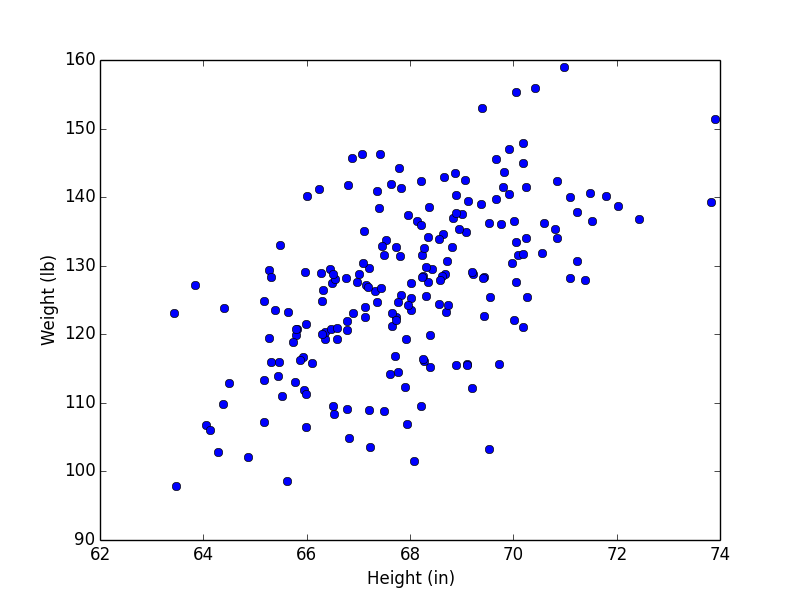

To create a linear model to explain this data, we might draw this line:


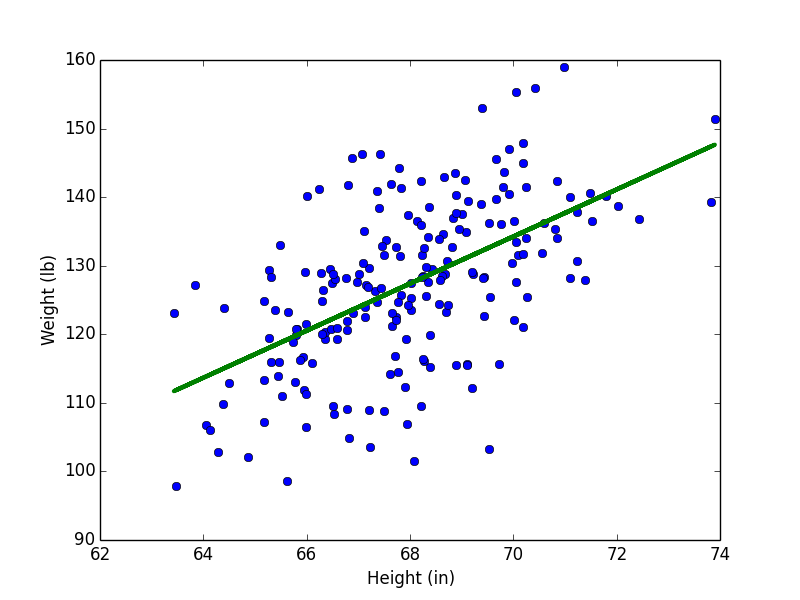

Now, if we wanted to estimate the weight of a player with a height of 73 inches, we could estimate that it is around 143 pounds.

A line is a rough approximation, but it allows us the ability to explain and predict variables that have a linear relationship with each other. In the rest of the lesson, we will learn how to perform Linear Regression.

In [8]:
import matplotlib.pyplot as plt
import numpy as np

## Points and Lines

A line is determined by its slope and its intercept. In other words, for each point y on a line we can say:

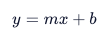

where m is the slope, and b is the intercept. y is a given point on the y-axis, and it corresponds to a given x on the x-axis.

The slope is a measure of how steep the line is, while the intercept is a measure of where the line hits the y-axis.

When we perform Linear Regression, the goal is to get the “best” m and b for our data. We will determine what “best” means in the next exercises.

[73.5, 82.0, 90.5, 99.0, 107.5, 116.0, 124.5, 133.0, 141.5, 150.0, 158.5, 167.0]


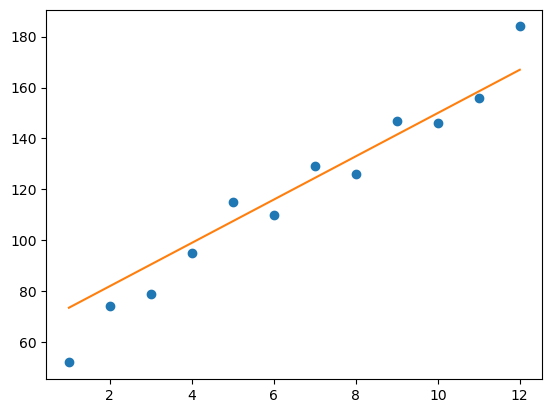

In [20]:
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
revenue = [52, 74, 79, 95, 115, 110, 129, 126, 147, 146, 156, 184]

#slope:
m = 8.5
#intercept:
b = 65

y = [ i * m + b for i in months ]
print(y)

plt.plot(months, revenue, "o")

plt.plot(months, y)

plt.show()

## Loss

When we think about how we can assign a slope and intercept to fit a set of points, we have to define what the best fit is.

For each data point, we calculate loss, a number that measures how bad the model’s (in this case, the line’s) prediction was. You may have seen this being referred to as error.

We can think about loss as the squared distance from the point to the line. We do the squared distance (instead of just the distance) so that points above and below the line both contribute to total loss in the same way:

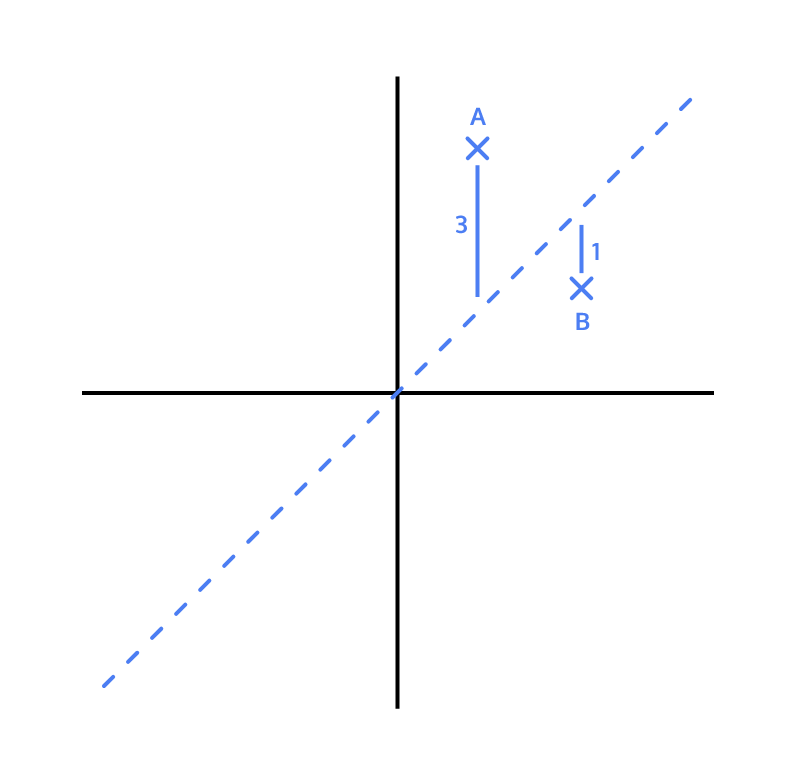

In this example:

- For point A, the squared distance is 9 (3²)
- For point B, the squared distance is 1 (1²)
So the total loss, with this model, is 10. If we found a line that had less loss than 10, that line would be a better model for this data.

In [21]:
x = [1, 2, 3]
y = [5, 1, 3]

#y = x
m1 = 1
b1 = 0

#y = 0.5x + 1
m2 = 0.5
b2 = 1


We have three points, (1, 5), (2, 1), and (3, 3). We are trying to find a line that produces lowest loss.

We have provided you the list of x-values, x, and y-values, y, for these points.

Find the y-values that the line with weights m1 and b1 would predict for the x-values given. Store these in a list called y_predicted1.

In [22]:
y_predicted1 = [ i * m1 + b1 for i in x ]
print(y_predicted1)

[1, 2, 3]


Find the y values that the line with weights m2 and b2 would predict for the x-values given. Store these in a list called y_predicted2.

In [23]:
y_predicted2 = [ i * m2 + b2 for i in x ]
print(y_predicted2)

[1.5, 2.0, 2.5]


Create a variable called total_loss1 and set it equal to zero.

Then, find the sum of the squared distance between the actual y-values of the points and the y_predicted1 values by looping through the list:

- Calculating the difference between y and y_predicted1
- Squaring the difference
- Adding it to total_loss1

In [24]:
total_loss1 = 0

for i in range(len(y)):
  diff = y[i] - y_predicted1[i]
  total_loss1 += diff ** 2

print(total_loss1)

17


Create a variable called total_loss2 and set it equal to zero.

Find the sum of the squared distance between the actual y-values of the points and the y_predicted2 values by looping through the list:

- Calculating the difference between y and y_predicted2
- Squaring the difference
- Adding it to total_loss2

In [25]:
total_loss2 = 0

for i in range(len(y)):
  diff = y[i] - y_predicted2[i]
  total_loss2 += diff ** 2

print(total_loss2)

13.5


## Minimizing Loss

The goal of a linear regression model is to find the slope and intercept pair that minimizes loss on average across all of the data.

## Gradient Descent for Intercept

As we try to minimize loss, we take each parameter we are changing, and move it as long as we are decreasing loss. It’s like we are moving down a hill, and stop once we reach the bottom:

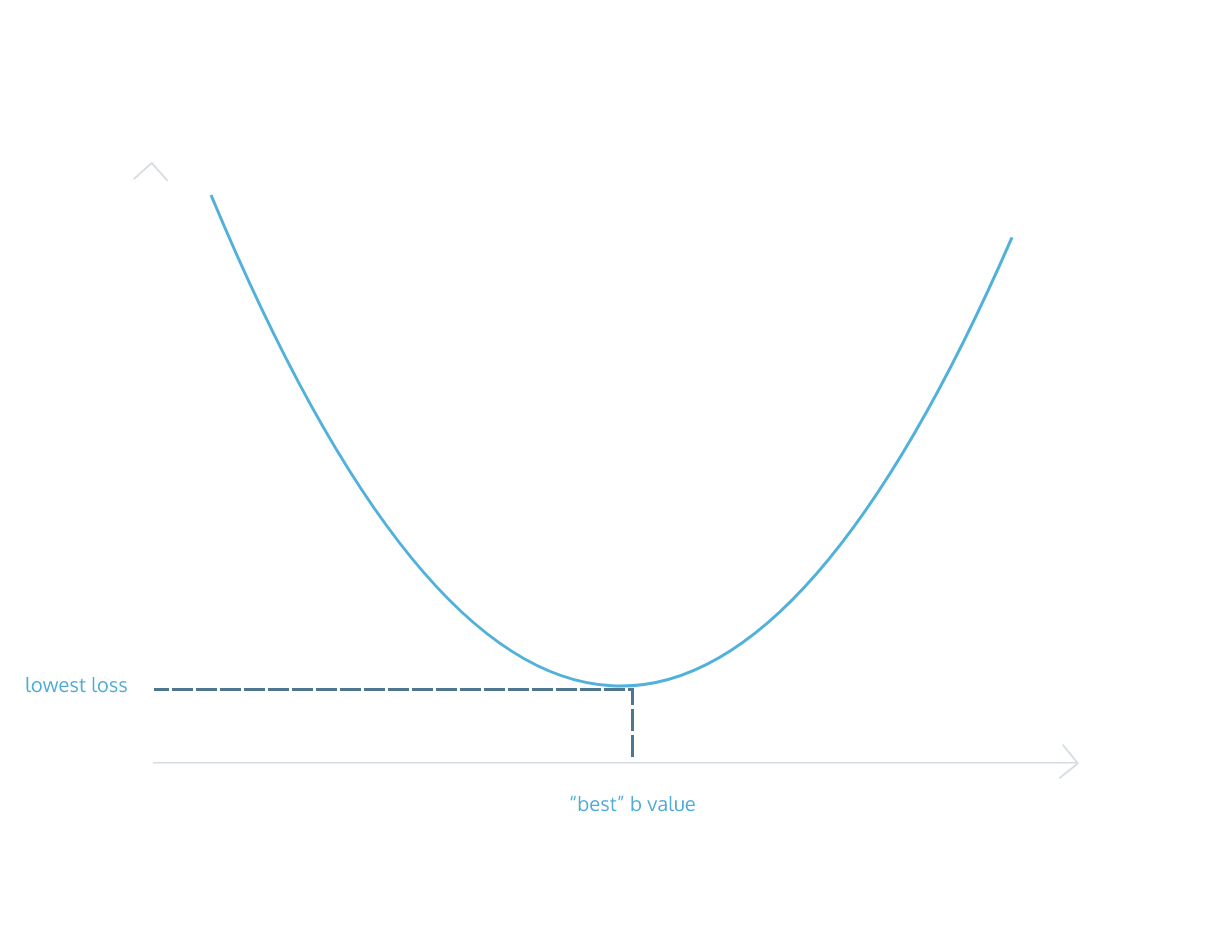

The process by which we do this is called gradient descent. We move in the direction that decreases our loss the most. Gradient refers to the slope of the curve at any point.

For example, let’s say we are trying to find the intercept for a line. We currently have a guess of 10 for the intercept. At the point of 10 on the curve, the slope is downward. Therefore, if we increase the intercept, we should be lowering the loss. So we follow the gradient downwards.

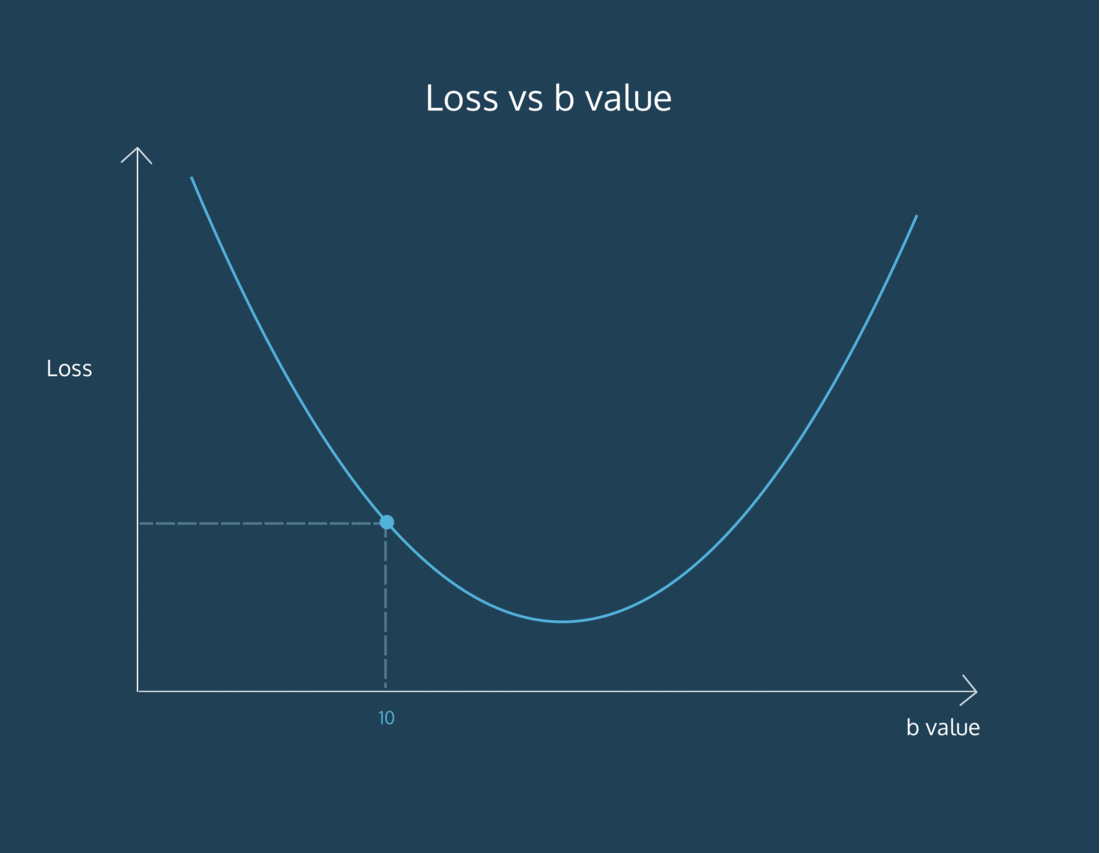

We derive these gradients using calculus. It is not crucial to understand how we arrive at the gradient equation. To find the gradient of loss as intercept changes, the formula comes out to be:

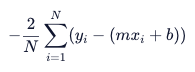


- `N` is the number of points we have in our dataset
- `m` is the current gradient guess
- `b` is the current intercept guess

Basically:

- we find the sum of <code>y_value - (m*x_value + b)</code> for all the <code>y_values</code> and <code>x_values</code> we have
- and then we multiply the sum by a factor of <code>-2/N</code>. N is the number of points we have.

In [2]:
def get_gradient_at_b(x, y, b, m):
  N = len(x)
  diff = 0
  for i in range(N):
    x_val = x[i]
    y_val = y[i]
    diff += (y_val - ((m * x_val) + b))
  b_gradient = -(2/N) * diff  
  return b_gradient

## Gradient Descent for Slope

We have a function to find the gradient of `b` at every point. To find the m gradient, or the way the loss changes as the slope of our line changes, we can use this formula:

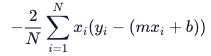

Once more:

- `N` is the number of points you have in your dataset
- `m` is the current gradient guess
- `b` is the current intercept guess

To find the m gradient:

- we find the sum of <code>x_value * (y_value - (m*x_value + b))</code> for all the `y_values` and `x_values` we have
- and then we multiply the sum by a factor of -2/N. N is the number of points we have.

Once we have a way to calculate both the `m` gradient and the `b` gradient, we’ll be able to follow both of those gradients downwards to the point of lowest loss for both the `m` value and the `b` value. Then, we’ll have the best `m` and the best `b` to fit our data!

In [3]:
def get_gradient_at_m(x, y, m, b):
    diff = 0
    N = len(x)
    for i in range(N):
      y_val = y[i]
      x_val = x[i]
      diff += x_val*(y_val - ((m * x_val) + b))
    m_gradient = -2/N * diff
    return m_gradient

Now that we know how to calculate the gradient, we want to take a “step” in that direction. However, it’s important to think about whether that step is too big or too small. We don’t want to overshoot the minimum error!

We can scale the size of the step by multiplying the gradient by a learning rate.

To find a new `b` value, we would say:

`new_b = current_b - (learning_rate * b_gradient)`

where `current_b` is our guess for what the `b` value is, `b_gradient` is the gradient of the loss curve at our current guess, and `learning_rate` is proportional to the size of the step we want to take.



In [4]:
def step_gradient(b_current, m_current, x, y, learning_rate):
    b_gradient = get_gradient_at_b(x, y, b_current, m_current)
    m_gradient = get_gradient_at_m(x, y, b_current, m_current)
    b = b_current - (learning_rate * b_gradient)
    m = m_current - (learning_rate * m_gradient)
    return [b, m]

### Convergence

How do we know when we should stop changing the parameters `m` and `b`? How will we know when our program has learned enough?

To answer this, we have to define convergence. Convergence is when the loss stops changing (or changes very slowly) when parameters are changed.

Hopefully, the algorithm will converge at the best values for the parameters `m` and `b`.


### Learning Rate

We want our program to be able to iteratively learn what the best `m` and `b` values are. So for each `m` and `b` pair that we guess, we want to move them in the direction of the gradients we’ve calculated. But how far do we move in that direction?

We have to choose a __learning rate__, which will determine how far down the loss curve we go.

A small learning rate will take a long time to converge — you might run out of time or cycles before getting an answer. A large learning rate might skip over the best value. It might never converge! Oh no!

In [5]:
def gradient_descent(x, y, learning_rate, num_iterations):
  b = 0
  m = 0
  for i in range(num_iterations):
   
    b, m = step_gradient(b, m, x, y, learning_rate)
  return [b, m]

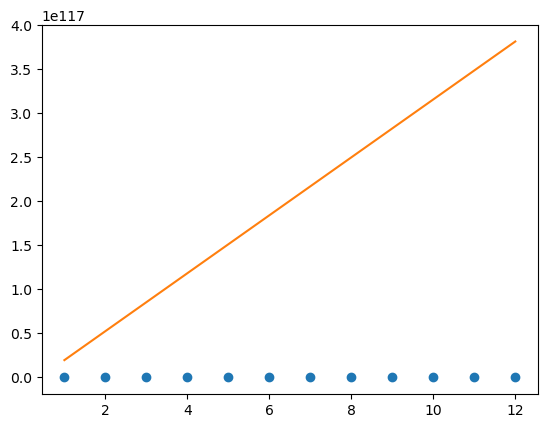

In [6]:
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
revenue = [52, 74, 79, 95, 115, 110, 129, 126, 147, 146, 156, 184]

b, m = gradient_descent(months, revenue, 0.01, 1000)


y = [ m * x + b for x in months ]

plt.plot(months, revenue, "o")
plt.plot(months, y)

plt.show()

## Scikit-Learn

In [7]:
from sklearn.linear_model import LinearRegression

In [12]:
temperature = np.array(range(60, 100, 2))
temperature = temperature.reshape(-1, 1)

sales = [65, 58, 46, 45, 44, 42, 40, 40, 36, 38, 38, 28, 30, 22, 27, 25, 25, 20, 15, 5]

In [15]:
line_fitter = LinearRegression()
line_fitter.fit(temperature, sales)

LinearRegression()

The `.fit()` method gives the model two variables that are useful to us:

1. the `line_fitter.coef_`, which contains the slope
2. the `line_fitter.intercept_`, which contains the intercept

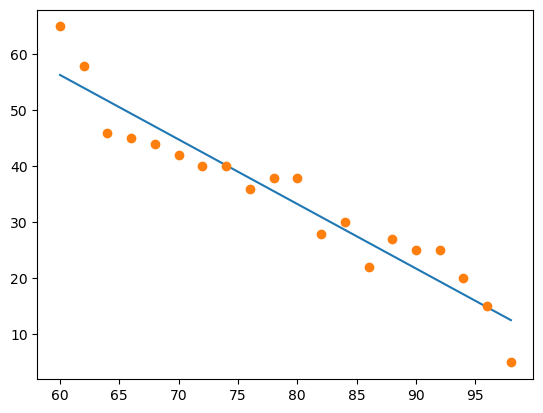

In [19]:

sales_predict = line_fitter.predict(temperature)

plt.plot(temperature, sales_predict)
plt.plot(temperature, sales, 'o')
plt.show()